<a href="https://colab.research.google.com/github/nurfnick/Mathematical_Musings/blob/main/CrapsSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Craps Simulator for One Shooter

## MAA OK-AR Section Presentation



> **Abstract**: 
> The game of craps is a simple probabilitstic game played with dice around the world for gambling purposes.  We will examine the game through simulation using python and Jupyter notebooks.  We will discuss expected values, interesting observations on the game play and why the table is often the loudest at the casino.



## Simulating Six Sided Dice

In [ ]:
import random

random.randint(1,6)

2

Above code rolls a dice once.

In [ ]:
def Roll2Dice():
  return [random.randint(1,6),random.randint(1,6)]

In [ ]:
Roll2Dice()

[5, 4]

This rolls two dice.  The game of craps is actually interested in the sum of the two dice most of the time...  We know that this is distributed like the following:

Sum | Probability
----|------------
2|$\frac 1{36}$
3|$\frac 2{36}$
4|$\frac 3{36}$
5|$\frac 4{36}$
6|$\frac 5{36}$
7|$\frac 6{36}$
8|$\frac 5{36}$
9|$\frac 4{36}$
10|$\frac 3{36}$
11|$\frac 2{36}$
12|$\frac 1{36}$

We want to make sure we are seeing that in our simulation!

First I check using the built-in histogram feature from `numpy` and visualize with `matplotlib`.

In [19]:
from numpy import histogram
import numpy as np
import matplotlib.pyplot as plt

listy = []

for i in range(10000):
  listy.append(sum(Roll2Dice()))

histogram(listy,bins = 11)

(array([ 272,  567,  839, 1167, 1377, 1653, 1395, 1092,  839,  526,  273]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]))

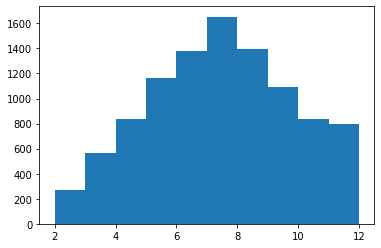

In [22]:
plt.hist(listy)
plt.show()

That did not come out in the way I expected.  Let's tweek it a bit and do it by hand.

In [23]:
sums = range(2,13,1)
newlist =[]
for i in sums:
  newlist.append(0)

for i in listy:
  for j in sums:
    if i == j:
      newlist[i-2] +=1

newlist

[272, 567, 839, 1167, 1377, 1653, 1395, 1092, 839, 526, 273]

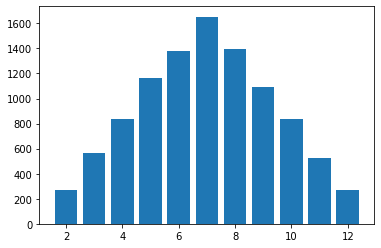

In [24]:
plt.bar(x =sums, height = newlist)
plt.show()

Above I have checked that the outcomes are random but as expected.  Both codes do the same thing, even though the output is a bit different!  We should check that this does indeed follow the distribution given by preforming the goodness of fit test.

$$
\chi^2 = \sum_{i = 1}^n \frac{\left(O_i - E_i\right)^2}{E_i}
$$


In [25]:
expected = np.array([1,2,3,4,5,6,5,4,3,2,1])
expected = expected/36*10000

actual = np.array(newlist)

chi = 0
for i,val in enumerate(expected):
  chi += (val-actual[i])**2/val

chi

5.468180000000001

In [31]:
from scipy import stats

1-stats.chi2.cdf(chi,10)

0.8577934151395078

Getting the probability is much easier by using the builtins!

In [26]:
stats.chisquare(actual,expected)

Power_divergenceResult(statistic=5.468180000000001, pvalue=0.8577934151395078)

## Come Out Roll

The first roll of craps is called the **come out roll**.  It can be repeated later in the game.  There are three possible outcomes:

1. **Natural**: A seven or 11 is a natural and the Pass Line Bet wins
2. **Craps**: A two, three or twelve is craps and the Pass Line Bet Losses
3. **Set the Point**: 4,5,6,8,9,10 is rolled, the shooter continues to roll

In [ ]:
def ComeOutRoll(TwoDice):
  s = sum(TwoDice)
  if (s == 2)|(s == 3)|(s==12):
    return 'Craps'
  elif (s == 7)|(s == 11):
    return 'comeAgain'
  else:
    return s #return the point

ComeOutRoll([4,4])

8

In [ ]:
ComeOutRoll([6,6])

'Craps'

The `ComeOutRoll` is the first roll in the craps game.  There are three options **Craps** (2,3,12) **Natural** (7,11) (designated here as 'comeAgain' since you will get another come out roll.  Any othe value will set the point, the function just returns that number.

In [ ]:
def SetPointRoll(TwoDice,point):
  s = sum(TwoDice)
  if s == 7:
    return 'SevenOut'
  elif s == point:
    return 'comeAgain'
  else:
    return point

SetPointRoll([5,4],9)

'comeAgain'

In [ ]:
SetPointRoll([3,4],4)

'SevenOut'

In [ ]:
SetPointRoll([3,1],5)

5

After the point has been set, you will roll over and over again until you **comeAgain** by hitting the same point or **SevenOut** by rolling a 7.  The function returns the point if neither of those happen.

In [ ]:
def PlayCraps():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter


In [ ]:
PlayCraps()

4

`PlayCraps` will play the game returning the number of rolls until you **Crap** or **SevenOut**.  Let's compute some statistics about it.

In [ ]:

list1 = []
for i in range(100000):
  list1.append(PlayCraps())
sum(list1)/len(list1)


6.69846

(array([6.7782e+04, 2.2541e+04, 6.7630e+03, 1.9840e+03, 6.2800e+02,
        2.1500e+02, 6.1000e+01, 2.0000e+01, 3.0000e+00, 3.0000e+00]),
 array([ 1.,  8., 15., 22., 29., 36., 43., 50., 57., 64., 71.]),
 <a list of 10 Patch objects>)

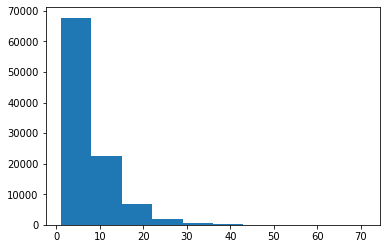

In [ ]:
import matplotlib.pyplot as plt

plt.hist(list1)

The distribution is not normal!  Seems like it is mostly just a few rolls.  I wonder what the expected or average value is.

In [ ]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps())
  list2.append(sum(list1)/len(list1))

(array([  6.,  33.,  72., 168., 256., 216., 148.,  70.,  23.,   8.]),
 array([6.103 , 6.2156, 6.3282, 6.4408, 6.5534, 6.666 , 6.7786, 6.8912,
        7.0038, 7.1164, 7.229 ]),
 <a list of 10 Patch objects>)

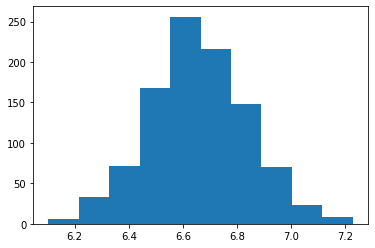

In [ ]:
plt.hist(list2)

In [ ]:
from numpy import mean

mean(list2)

6.657482

As I perused the internet for this value, I found lots of answers that were larger!  How can that be!  At first I thought I had the program wrong.  Below I write some code to check the craps game by hand.

In [ ]:
def ErrorTestingPlayCraps():
  listOfRolls = []
  randRoll = Roll2Dice()
  listOfRolls.append(randRoll)
  x = ComeOutRoll(randRoll)
  rollCounter = 1
  PassLineWins = 0
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      listOfRolls.append('Pass Line Win')
      PassLineWins += 1
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      x = ComeOutRoll(randRoll)
    else:
      point = x
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      listOfRolls.append(point)
      x = SetPointRoll(randRoll,point)
  else:
    listOfRolls.append(x)
  return rollCounter, listOfRolls

In [ ]:
ErrorTestingPlayCraps()

(7,
 [[2, 2],
  [3, 1],
  4,
  'Pass Line Win',
  [5, 2],
  'Pass Line Win',
  [2, 6],
  [4, 5],
  8,
  [2, 6],
  8,
  'Pass Line Win',
  [2, 1],
  'Craps'])

In [ ]:
ErrorTestingPlayCraps()

(4, [[3, 4], 'Pass Line Win', [3, 1], [4, 6], 4, [2, 5], 4, 'SevenOut'])

This simulation is more fun as it really shows you what happens on each roll.


Trying this ***many*** times, I did not see an error.  This makes me feel like the reference [here](https://wizardofodds.com/ask-the-wizard/craps/probability/) has an error in their computation.  Let's see if we can find the value theoretically we have simulated!

Here is the theoretical expected value.  Call the expected value $x$.  Then on the **ComeOutRoll**, craps results in the end of the game, natural results in playing the game again plus the roll you made and setting the point will result in a small game.

Each point will have a different expected value.  The point at 4 or 10 will result in an expected value of 4 (point rolls end with 4 or 7 $p = \frac{9}{36}$)  The game continues the probability of $\frac39$.  All the rest are similar.  This creates an expected value computation of

$$
x
=
\frac4{36}
+
\frac8{36}(x+1)
+
2\cdot \frac3{36}\left(4+1+\frac39x\right)
+
2\cdot \frac4{36}\left(3.6+1+\frac4{10}x\right)
+
2\cdot \frac5{36}\left(\frac{36}{11}+1+\frac5{11}x\right)
$$

In [ ]:
import sympy

x = sympy.Symbol('x')
sympy.solve(4/36+8/36*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[6.65737051792830]

I am curious if I can use this to match up the variance.  Under the assumption that this is a geometric distribution (I stretch I think!)  The expected value is 
$$
E[x] = \frac1p = \frac{1671}{251}\approx 6.657
$$
The variance is similarly computed as
$$
E\left[\left(x-E[x]\right)^2\right] = \frac{1-p}{p^2} = \frac{1671\cdot 1420}{251^2} \approx 37.663
$$



In [ ]:
import numpy as np

(np.std(list1))**2


33.289595999999996

Not terribly far off.  Let's do a little more thorough checking of this value using a Monte Carlo simulation.

In [ ]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps())
  list2.append((np.std(list1))**2)

(array([  6.,  30., 108., 189., 273., 183., 123.,  56.,  25.,   7.]),
 array([24.933239 , 26.8208751, 28.7085112, 30.5961473, 32.4837834,
        34.3714195, 36.2590556, 38.1466917, 40.0343278, 41.9219639,
        43.8096   ]),
 <a list of 10 Patch objects>)

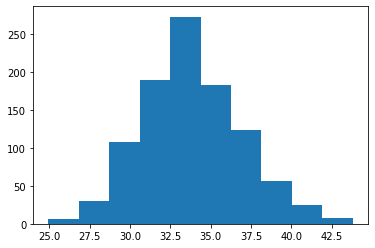

In [ ]:
plt.hist(list2)

In [ ]:
mean(list2)

33.854043139

This is clearly not correct.  It gives me an estimate but I am missing some important behavior of the random variable.  Using the numerical simulation gives me a great way to check this though!

## I didn't understand the game of craps!

The only time you must pass the dice is when you seven out.  Although the pass line bet loses on a craps roll, you can roll again.  Let's fix that in our code!

In [ ]:
def PlayCraps4Real():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'SevenOut'):
    if (x == 'comeAgain') or (x == 'Craps'):
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter

In [ ]:
list1 = []
for i in range(100000):
  list1.append(PlayCraps4Real())
sum(list1)/len(list1)

8.54563

In [ ]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps4Real())
  list2.append(sum(list1)/len(list1))

(array([  5.,  26.,  77., 163., 215., 227., 174.,  81.,  24.,   8.]),
 array([7.889 , 8.0165, 8.144 , 8.2715, 8.399 , 8.5265, 8.654 , 8.7815,
        8.909 , 9.0365, 9.164 ]),
 <a list of 10 Patch objects>)

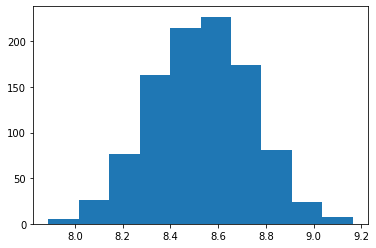

In [ ]:
plt.hist(list2)

In [ ]:
mean(list2)

8.530351000000001

In [ ]:
x = sympy.Symbol('x')
sympy.solve(12/36*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[8.52551020408164]

This agrees with the reference from above...